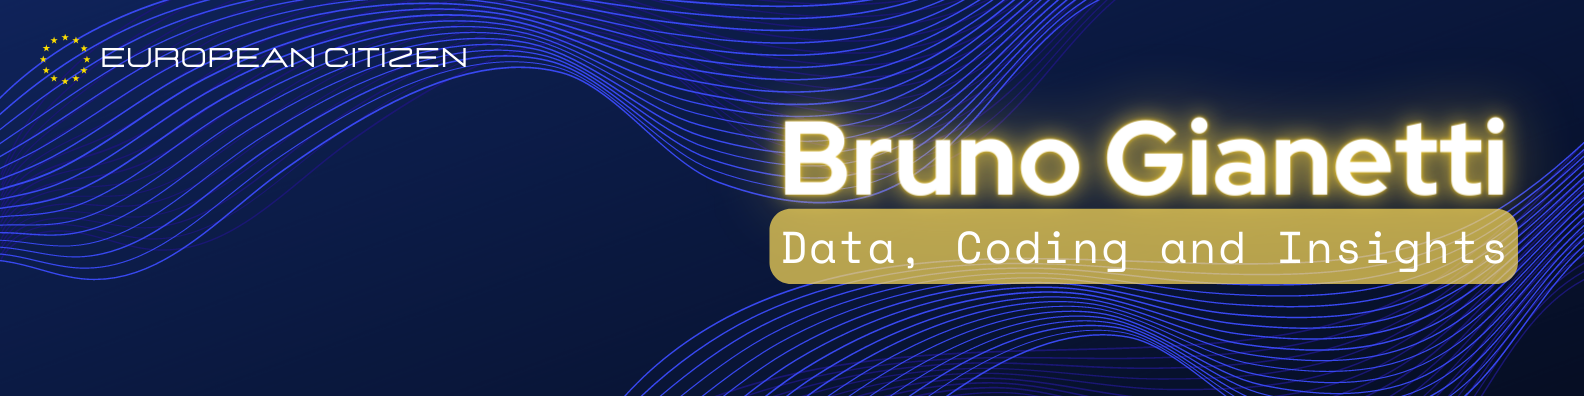

---
# Estudos estatísticos em dólar americano contra real brasileiro - um olhar quant.
---

## Importando bibliotecas

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web
import datetime as dt
import plotly.express as px
import seaborn as sns

## Acessando dados do ativo

In [285]:
start=dt.datetime(2003,1,1)
end=dt.datetime.today()

dados = yf.download('BRL=X', start=start, end=end, ignore_tz=True)
dados

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,2.9460,2.946000,2.923000,2.9230,2.9230,0
2003-12-02,2.9230,2.931000,2.923000,2.9310,2.9310,0
2003-12-03,2.9310,2.936000,2.926000,2.9310,2.9310,0
2003-12-04,2.9310,2.943000,2.931000,2.9430,2.9430,0
2003-12-05,2.9430,2.948000,2.934000,2.9340,2.9340,0
...,...,...,...,...,...,...
2023-02-14,5.1584,5.180900,5.126578,5.1584,5.1584,0
2023-02-15,5.1915,5.237500,5.144326,5.1915,5.1915,0
2023-02-16,5.2180,5.255600,5.195920,5.2180,5.2180,0


### Amplitude de preços em 20 anos

In [286]:
dados['Amplitude'] = dados['High'] - dados['Low']
dados

,Open,High,Low,Close,Adj Close,Volume,Amplitude
Date,,,,,,,
2003-12-01,2.9460,2.946000,2.923000,2.9230,2.9230,0,0.023000
2003-12-02,2.9230,2.931000,2.923000,2.9310,2.9310,0,0.008000
2003-12-03,2.9310,2.936000,2.926000,2.9310,2.9310,0,0.010000
2003-12-04,2.9310,2.943000,2.931000,2.9430,2.9430,0,0.012000
2003-12-05,2.9430,2.948000,2.934000,2.9340,2.9340,0,0.014000
...,...,...,...,...,...,...,...
2023-02-14,5.1584,5.180900,5.126578,5.1584,5.1584,0,0.054322
2023-02-15,5.1915,5.237500,5.144326,5.1915,5.1915,0,0.093174
2023-02-16,5.2180,5.255600,5.195920,5.2180,5.2180,0,0.059680


In [287]:
dados_amplitude = dados['Amplitude']
type(dados_amplitude)

pandas.core.series.Series

### Aferindo se temos células com valores nulos.

In [288]:
dados_amplitude.hasnans

False

### Valores Máximos e Mínimos de variação de preço

In [289]:
dados_amplitude.max()

0.3147001266479492

In [290]:
dados_amplitude.min()

0.0

### Plotagem de gráfico com os valores aferidos de Amplitude

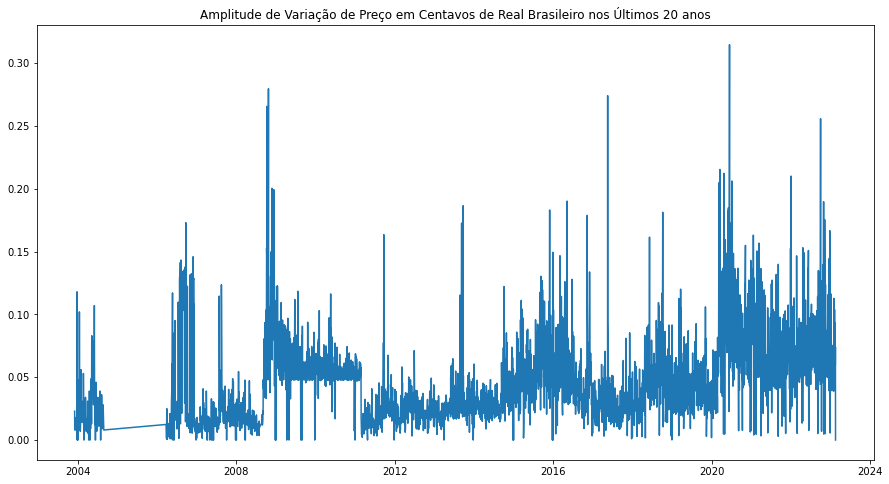

In [291]:
plt.figure(figsize=(15,8))
plt.plot(dados.index, dados['Amplitude'])
plt.title('Amplitude de Variação de Preço em Centavos de Real Brasileiro nos Últimos 20 anos')
plt.show()

### Raspando os dados do FED para analisar volatilidade no Dólar Americano contra Real Brasileiro.

#### PIB Americano

In [292]:
gdp = web.DataReader('GDP', 'fred', start)
gdp

,GDP
DATE,
2003-01-01,11174.129
2003-04-01,11312.766
2003-07-01,11566.669
2003-10-01,11772.234
2004-01-01,11923.447
...,...
2021-10-01,24349.121
2022-01-01,24740.480
2022-04-01,25248.476


In [293]:
px.line(gdp, x=gdp.index, y='GDP')

#### Inflação Americana

In [294]:
cpi = web.DataReader('CPIAUCSL', 'fred', start)
px.bar(data_frame=cpi.pct_change()*100, x=cpi.index, y='CPIAUCSL', labels={'CPIAUCSL':'Inflação (%)'})

#### Treasury Americano de 3 meses

In [295]:
t3mo = web.DataReader('DGS3MO', 'fred', start)
px.line(data_frame=t3mo, x=t3mo.index, y='DGS3MO')

#### Treasury Americano de 10 anos

In [296]:
t10 = web.DataReader('DGS10', 'fred', start)
px.line(data_frame=t10, x=t10.index, y='DGS10')

#### Taxa de Demprego

In [297]:
desemprego = web.DataReader('UNRATE', 'fred', start)
px.line(data_frame=desemprego, x=desemprego.index, y='UNRATE')

#### Payroll

In [298]:
payroll = web.DataReader('PAYEMS', 'fred', start)
px.line(data_frame=payroll, x=payroll.index, y='PAYEMS')

In [299]:
px.bar(data_frame=payroll.pct_change(), x=payroll.index, y='PAYEMS')

#### Agregado Monetário Americano - M2

In [300]:
agregado = web.DataReader('M2', 'fred', start)
px.line(data_frame=agregado, x=agregado.index, y='M2')

#### Ativos do FED

In [301]:
ativo = web.DataReader('WALCL', 'fred', start)
px.line(data_frame=ativo, x=ativo.index, y='WALCL')

## Comparação Ativo X Indicador
### Dólar/Real X PIB Americano

In [302]:
comparacao_dolar_pib = pd.DataFrame(dados_amplitude)
comparacao_dolar_pib['PIB AMERICANO'] = gdp
comparacao_dolar_pib.dropna(inplace=True)
comparacao_dolar_pib.reset_index(inplace=True)
comparacao_dolar_pib

,Date,Amplitude,PIB AMERICANO
0,2004-01-01,0.000000,11923.447
1,2004-04-01,0.010000,12112.815
2,2004-07-01,0.017000,12305.307
3,2007-01-01,0.001500,14215.651
4,2007-10-01,0.022400,14715.058
5,2008-01-01,0.000000,14706.538
6,2008-10-01,0.047300,14608.208
7,2009-01-01,0.000000,14430.901
8,2009-04-01,0.065300,14381.236
9,2009-07-01,0.048100,14448.882


In [303]:
comparacao_dolar_pib.shape

(48, 3)

In [304]:
comparacao_dolar_pib_amplitude_tratada = comparacao_dolar_pib.query("Amplitude > 0")
comparacao_dolar_pib_amplitude_tratada

,Date,Amplitude,PIB AMERICANO
1,2004-04-01,0.010000,12112.815
2,2004-07-01,0.017000,12305.307
3,2007-01-01,0.001500,14215.651
4,2007-10-01,0.022400,14715.058
6,2008-10-01,0.047300,14608.208
8,2009-04-01,0.065300,14381.236
9,2009-07-01,0.048100,14448.882
10,2009-10-01,0.058900,14651.248
11,2010-04-01,0.047400,14980.193
12,2010-07-01,0.016900,15141.605


In [305]:
comparacao_dolar_pib_amplitude_tratada.pop('PIB AMERICANO')
comparacao_dolar_pib_amplitude_tratada

,Date,Amplitude
1,2004-04-01,0.010000
2,2004-07-01,0.017000
3,2007-01-01,0.001500
4,2007-10-01,0.022400
6,2008-10-01,0.047300
8,2009-04-01,0.065300
9,2009-07-01,0.048100
10,2009-10-01,0.058900
11,2010-04-01,0.047400
12,2010-07-01,0.016900


In [306]:
comparacao_dolar_pib_amplitude_tratada.describe()

,Amplitude
count,43.000000
mean,0.041367
std,0.030517
min,0.000100
25%,0.016950
50%,0.043900
75%,0.057400
max,0.125569


In [307]:
comparacao_dolar_pib_amplitude_tratada.median()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10496\3581328886.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Amplitude    0.0439
dtype: float64

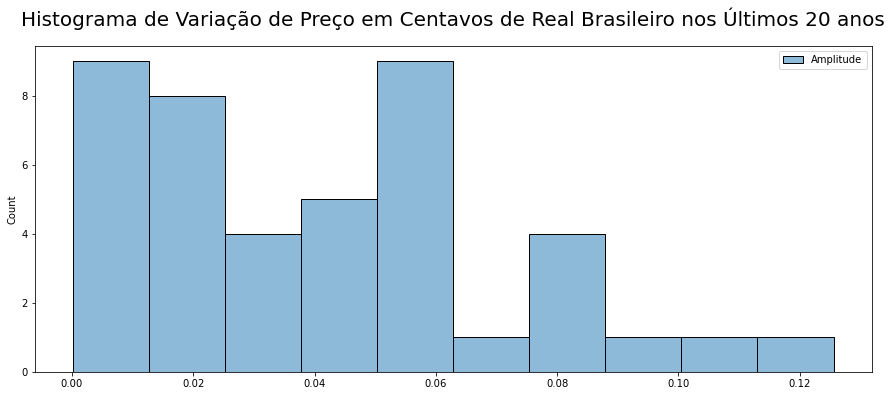

In [308]:
plt.figure(figsize=(15,6))
sns.histplot(data=comparacao_dolar_pib_amplitude_tratada, bins= 10)
plt.title('Histograma de Variação de Preço em Centavos de Real Brasileiro nos Últimos 20 anos', fontsize=20, pad=20)
plt.show()

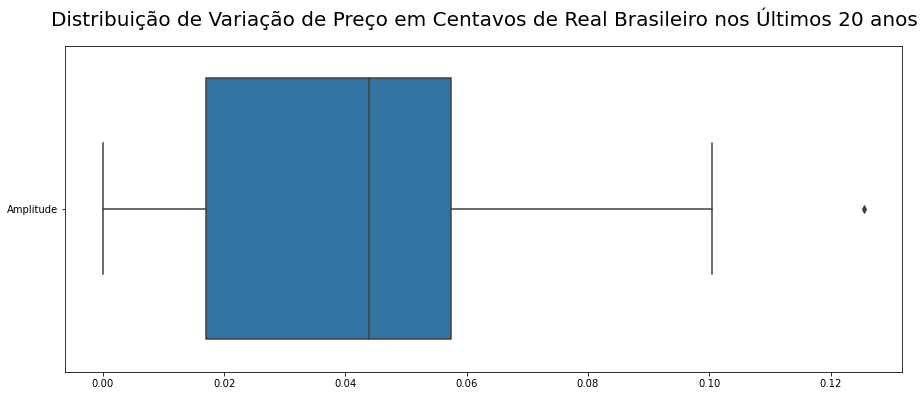

In [309]:
plt.figure(figsize=(15,6))
sns.boxplot(data=comparacao_dolar_pib_amplitude_tratada, orient='h')
plt.title('Distribuição de Variação de Preço em Centavos de Real Brasileiro nos Últimos 20 anos', fontsize=20, pad=20)
plt.show()

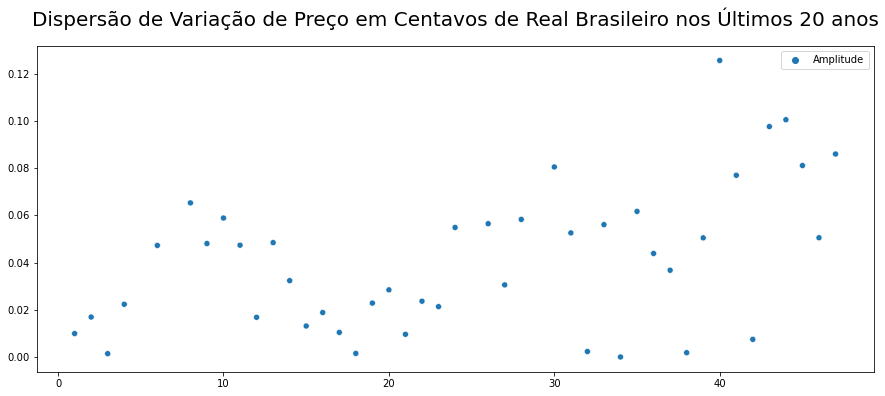

In [310]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=comparacao_dolar_pib_amplitude_tratada)
plt.title('Dispersão de Variação de Preço em Centavos de Real Brasileiro nos Últimos 20 anos', fontsize=20, pad=20)
plt.show()

## Comparação Ativo X Indicador
### Dólar/Real X Inflação Norteamericana

In [311]:
comparacao_dolar_inflacao = pd.DataFrame(dados_amplitude)
comparacao_dolar_inflacao['Inflação'] = cpi
comparacao_dolar_inflacao.dropna(inplace=True)
comparacao_dolar_inflacao.reset_index(inplace=True)
comparacao_dolar_inflacao

,Date,Amplitude,Inflação
0,2003-12-01,0.023000,185.500
1,2004-01-01,0.000000,186.300
2,2004-03-01,0.017000,187.100
3,2004-04-01,0.010000,187.400
4,2004-06-01,0.049000,188.900
...,...,...,...
138,2022-07-01,0.085988,294.628
139,2022-08-01,0.065550,295.320
140,2022-09-01,0.088300,296.539
141,2022-11-01,0.095800,298.598


In [312]:
comparacao_dolar_inflacao_amplitude_tratada = comparacao_dolar_inflacao.query("Amplitude > 0")
comparacao_dolar_inflacao_amplitude_tratada

,Date,Amplitude,Inflação
0,2003-12-01,0.023000,185.500
2,2004-03-01,0.017000,187.100
3,2004-04-01,0.010000,187.400
4,2004-06-01,0.049000,188.900
5,2004-07-01,0.017000,189.100
...,...,...,...
138,2022-07-01,0.085988,294.628
139,2022-08-01,0.065550,295.320
140,2022-09-01,0.088300,296.539
141,2022-11-01,0.095800,298.598


In [313]:
comparacao_dolar_inflacao_amplitude_tratada.pop('Inflação')
comparacao_dolar_inflacao_amplitude_tratada

,Date,Amplitude
0,2003-12-01,0.023000
2,2004-03-01,0.017000
3,2004-04-01,0.010000
4,2004-06-01,0.049000
5,2004-07-01,0.017000
...,...,...
138,2022-07-01,0.085988
139,2022-08-01,0.065550
140,2022-09-01,0.088300
141,2022-11-01,0.095800


In [314]:
comparacao_dolar_inflacao_amplitude_tratada.median()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10496\1240057506.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Amplitude    0.041852
dtype: float64

In [315]:
comparacao_dolar_inflacao_amplitude_tratada.describe()

,Amplitude
count,136.000000
mean,0.044740
std,0.031718
min,0.000100
25%,0.020750
50%,0.041852
75%,0.058825
max,0.138200


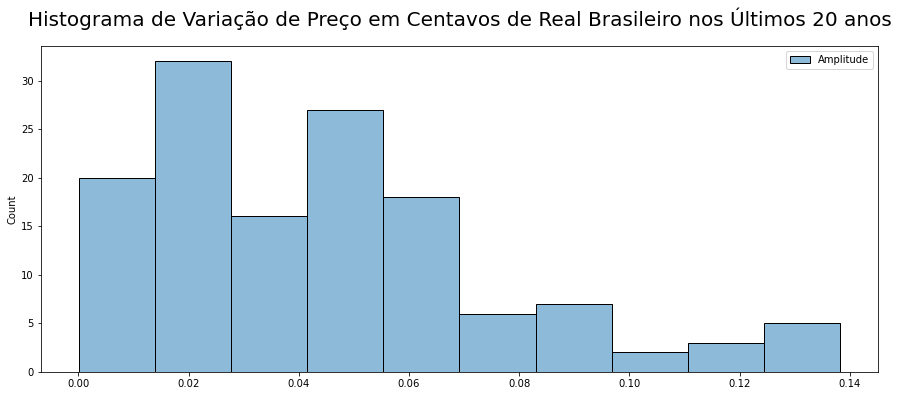

In [316]:
plt.figure(figsize=(15,6))
sns.histplot(data=comparacao_dolar_inflacao_amplitude_tratada, bins= 10)
plt.title('Histograma de Variação de Preço em Centavos de Real Brasileiro nos Últimos 20 anos', fontsize=20, pad=20)
plt.show()

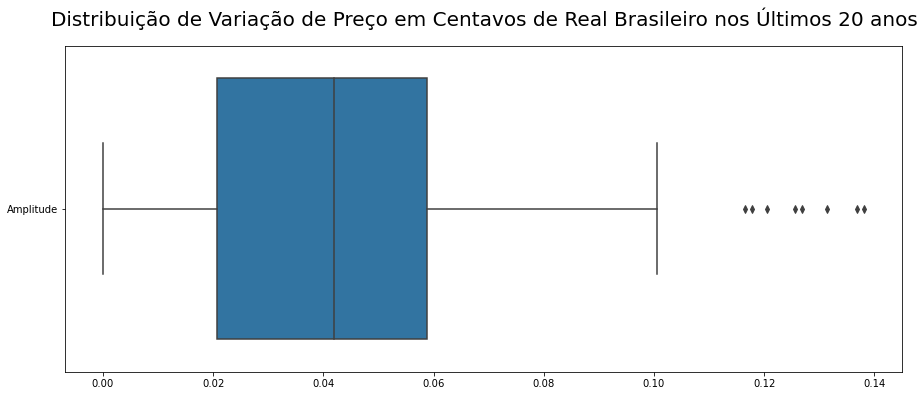

In [317]:
plt.figure(figsize=(15,6))
sns.boxplot(data=comparacao_dolar_inflacao_amplitude_tratada, orient='h')
plt.title('Distribuição de Variação de Preço em Centavos de Real Brasileiro nos Últimos 20 anos', fontsize=20, pad=20)
plt.show()

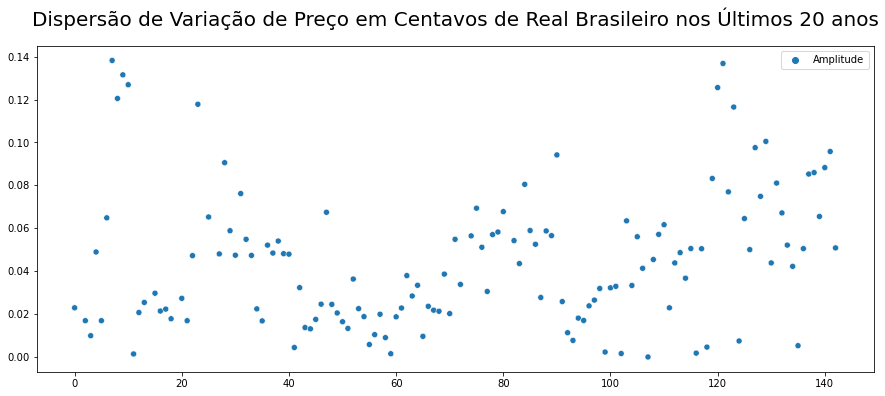

In [318]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=comparacao_dolar_inflacao_amplitude_tratada)
plt.title('Dispersão de Variação de Preço em Centavos de Real Brasileiro nos Últimos 20 anos', fontsize=20, pad=20)
plt.show()

## Comparação Ativo X Indicador
### Dólar/Real X Payroll

In [322]:
comparacao_dolar_payroll = pd.DataFrame(dados_amplitude)
comparacao_dolar_payroll['Payroll'] = payroll
comparacao_dolar_payroll.dropna(inplace=True)
comparacao_dolar_payroll.reset_index(inplace=True)
comparacao_dolar_payroll_amplitude_tratada = comparacao_dolar_payroll.query("Amplitude > 0")
comparacao_dolar_payroll_amplitude_tratada.pop('Payroll')
comparacao_dolar_payroll_amplitude_tratada

,Date,Amplitude
0,2003-12-01,0.023000
2,2004-03-01,0.017000
3,2004-04-01,0.010000
4,2004-06-01,0.049000
5,2004-07-01,0.017000
...,...,...
138,2022-07-01,0.085988
139,2022-08-01,0.065550
140,2022-09-01,0.088300
141,2022-11-01,0.095800


In [323]:
comparacao_dolar_payroll_amplitude_tratada.median()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10496\3635370935.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Amplitude    0.041852
dtype: float64

In [324]:
comparacao_dolar_payroll_amplitude_tratada.describe()

,Amplitude
count,136.000000
mean,0.044740
std,0.031718
min,0.000100
25%,0.020750
50%,0.041852
75%,0.058825
max,0.138200


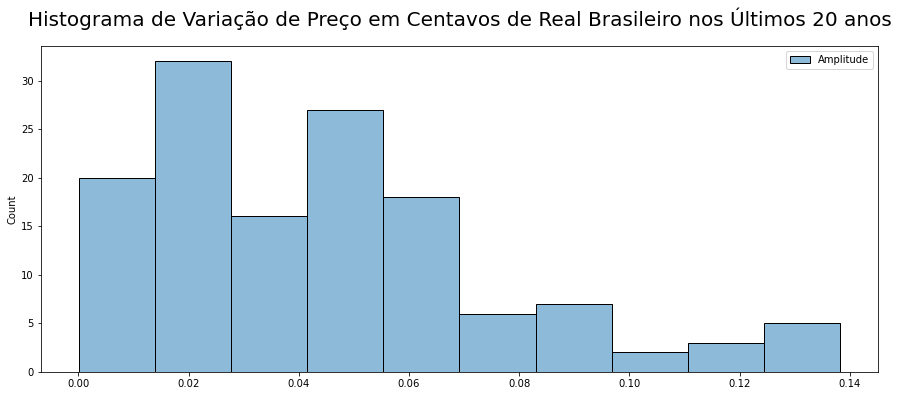

In [325]:
plt.figure(figsize=(15,6))
sns.histplot(data=comparacao_dolar_payroll_amplitude_tratada, bins= 10)
plt.title('Histograma de Variação de Preço em Centavos de Real Brasileiro nos Últimos 20 anos', fontsize=20, pad=20)
plt.show()

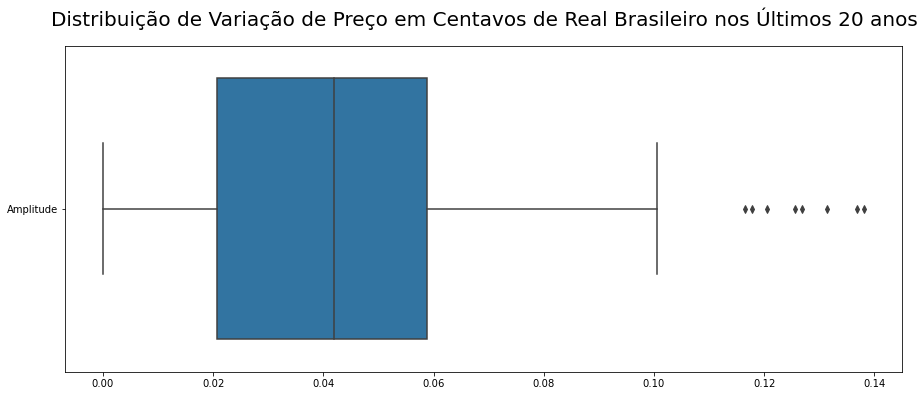

In [326]:
plt.figure(figsize=(15,6))
sns.boxplot(data=comparacao_dolar_payroll_amplitude_tratada, orient='h')
plt.title('Distribuição de Variação de Preço em Centavos de Real Brasileiro nos Últimos 20 anos', fontsize=20, pad=20)
plt.show()

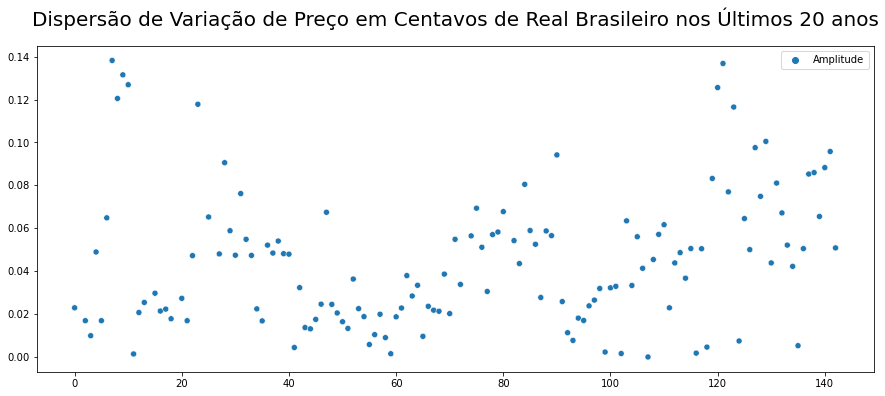

In [327]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=comparacao_dolar_payroll_amplitude_tratada)
plt.title('Dispersão de Variação de Preço em Centavos de Real Brasileiro nos Últimos 20 anos', fontsize=20, pad=20)
plt.show()